# Método da integral do erro

In [1]:
pip install control

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import control
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np

In [3]:
# Define transfer function of the system
s = control.tf('s')

## Process

In [4]:
Kp= 26.431820859167672
Tau= 984.0594888279699
Delay= 99.29375000395189

In [5]:
sys  = Kp/(Tau*s + 1)
sys

TransferFunction(array([26.43182086]), array([984.05948883,   1.        ]))

## Second Order Pade Approximation / Dead Time

In [6]:
num, den = control.pade(Delay, n=2, numdeg=0)
Pade = control.tf(num, den)
Pade

TransferFunction(array([0.00020286]), array([1.00000000e+00, 2.01422547e-02, 2.02855212e-04]))

## FOPDT

In [7]:
FOPDT = control.series(sys, Pade)
FOPDT

TransferFunction(array([0.00536183]), array([9.84059489e+02, 2.08211768e+01, 2.19763851e-01, 2.02855212e-04]))

In [8]:
# Simulate step response
t, y = control.step_response(FOPDT)

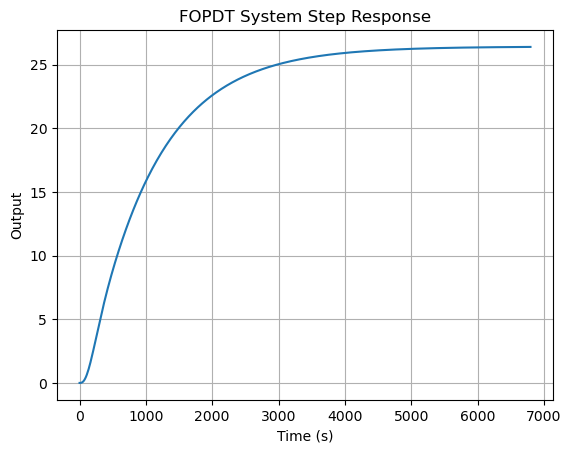

In [9]:
# Plot step response
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('FOPDT System Step Response')
plt.grid()
plt.show()

## Lendo Tabela de constantes para sintonia do PID 
<br> Tabela de constantes para sintonia do PID pelo método da integral do erro.
<br> Fonte: Campos e Teixeira (2010).

In [10]:
Caso = 'Caso Servo'
#Caso = 'Caso Regulador'

In [11]:
df = pd.read_excel('Tabela de constantes para sintonia do PID.xlsx', sheet_name=Caso)

In [12]:
df

,Controlador,Critério,A,B,C,D,E,F
0,PI,IAE,0.758,0.861,1.020,-0.323,-,-
1,PI,ITAE,0.586,-0.916,1.030,-0.165,-,-
2,PID,IAE,1.086,-0.869,0.740,-0.130,0.348,0.914
3,PID,ITAE,0.965,-0.850,0.796,-0.147,0.308,0.929


In [13]:
Controlador = 'PID'

In [14]:
Criterio = 'ITAE'

In [15]:
A = df[(df['Controlador']==Controlador)&((df['Critério']==Criterio))]['A'].values[0]
B = df[(df['Controlador']==Controlador)&((df['Critério']==Criterio))]['B'].values[0]
C = df[(df['Controlador']==Controlador)&((df['Critério']==Criterio))]['C'].values[0]
D = df[(df['Controlador']==Controlador)&((df['Critério']==Criterio))]['D'].values[0]
E = df[(df['Controlador']==Controlador)&((df['Critério']==Criterio))]['E'].values[0]
F = df[(df['Controlador']==Controlador)&((df['Critério']==Criterio))]['F'].values[0]

In [16]:
Kc = (A/Kp)*((Delay/Tau)**(B))

In [17]:
ti= Tau/(C + D*(Delay/Tau))

In [18]:
if type(E) == int or float:
    td = Tau * (E*((Delay/Tau)**F))
else:
    td = 0

In [19]:
print("Kc = {:.2f}".format(Kc))
print("ti = {:.2f}s".format(ti))
print("td = {:.2f}s".format(td))

Kc = 0.26
ti = 1259.73s
td = 35.99s


In [20]:
# Define transfer function of the PID Controller
Controller = Kc*(1 + (1/(ti*s)) + (td*s))

### Open Loop

In [21]:
Sys_Control = control.series(Controller, FOPDT)

### Closed Loop

In [22]:
# Create closed-loop system
cl_sys = control.feedback(Sys_Control, 1, sign=-1)

In [23]:
# Simulate step response
t, y = control.step_response(cl_sys)

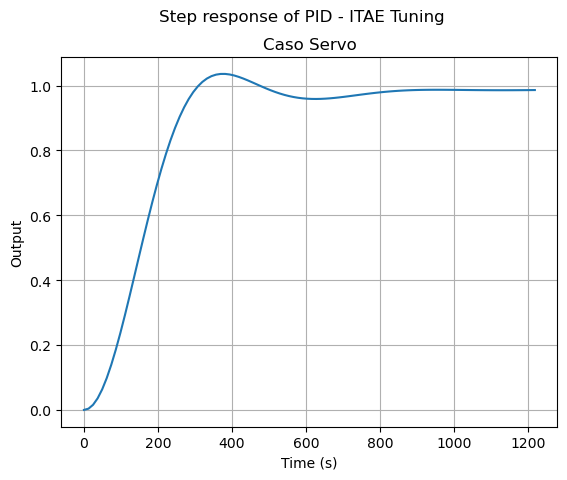

In [24]:
# Plot step response
plt.figure(1)
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.suptitle('Step response of ' + Controlador + ' - ' + Criterio + ' Tuning')
plt.title(Caso)
plt.grid()
plt.show()

## Shade Error - Integral Absolute Error (IAE)

In [25]:
y2 = np.ones(len(t))

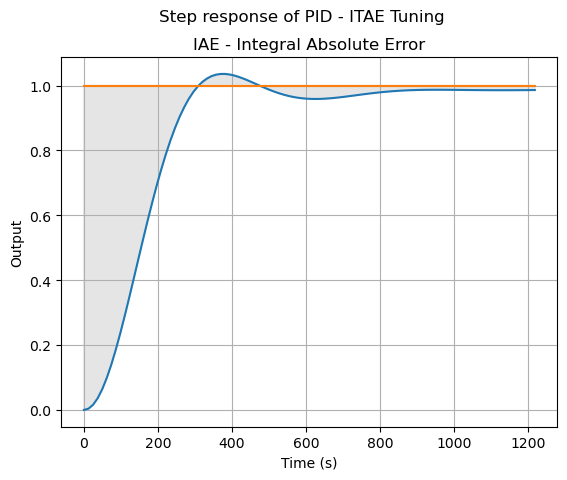

In [26]:
plt.figure(2)
plt.plot(t, y, label='Step Response')
plt.plot(t, y2, label='Ideal Response')

plt.fill_between(t, y, y2, where=(y <= y2), color='gray', alpha=0.2)
plt.fill_between(t, y, y2, where=(y2 <= y), color='gray', alpha=0.2)

plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.suptitle('Step response of ' + Controlador + ' - ' + Criterio + ' Tuning')
plt.title('IAE - Integral Absolute Error')
plt.grid()
plt.show()